## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [64]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [9]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [66]:
cards = sample_cards(100, 6, 3)
cards


array([[48, 64, 75],
       [ 5, 39, 80],
       [34, 91, 99],
       [26, 81, 90],
       [30, 33, 54],
       [ 2, 20, 24]])

and access the cards of each player with 

In [67]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([48, 64, 75]), array([ 5, 39, 80]))

The lowest card in the game is

In [68]:
np.min(cards)

2

In [69]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

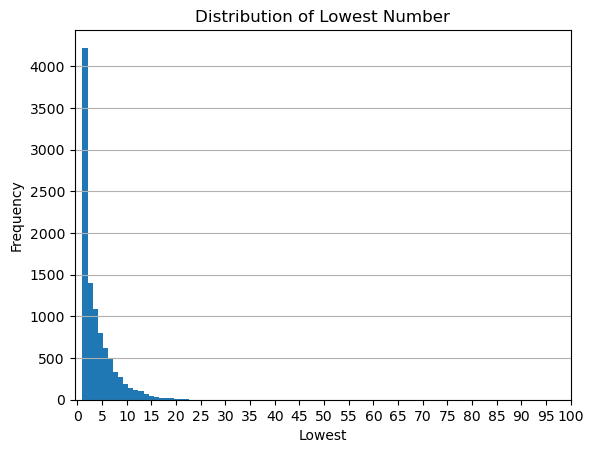

In [11]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt

def lowest_card(N, n, k, samples):
    
    lowest_card = []  
    
    for _ in range(1,samples):
        cards = sample_cards(N, n, k)
        lowest_card.append(np.min(cards))  
    
   
    
    # histogram
    plt.hist(lowest_card, bins= 30)
    plt.xlabel('Lowest')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lowest Number')
    plt.xticks(np.arange(0, N+1, 5))
    plt.grid(axis='y')
    plt.show()


N = 100  
n = 6    
k = 4   
samples = 10000  


lowest_card(N, n, k, samples)


### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

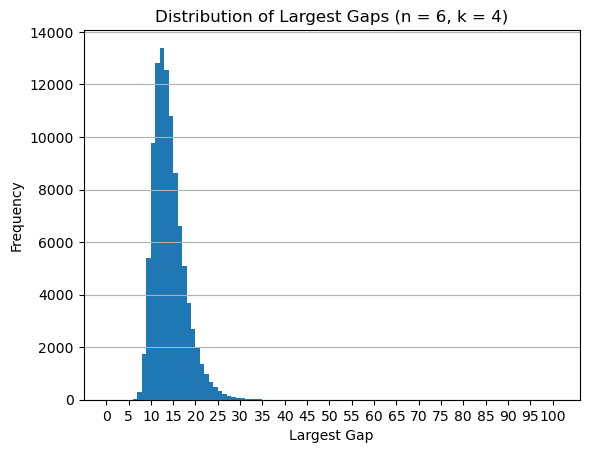

13.6286

In [3]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt

def largest_gap(cards):
    cards = cards.flatten()
    sort = np.sort(cards)
    gaps = np.diff(sort) 
    return np.max(gaps)

def largestgap_cards(N, n, k, samples):
    
    largest_gaps = []  
    
    for _ in range(samples):
        cards = sample_cards(N, n, k)
        largest_gaps.append(largest_gap(cards))
    
    # histogram
    plt.hist(largest_gaps, bins=np.arange(0, N+2))
    plt.xlabel('Largest Gap')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Largest Gaps (n = {n}, k = {k})')
    plt.xticks(np.arange(0, N+1, 5))
    plt.grid(axis='y')
    plt.show()
    return np.mean(largest_gaps )

N = 100  
n = 6    
k = 4   
samples = 100000  

largestgap_cards(N, n, k, samples)


Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

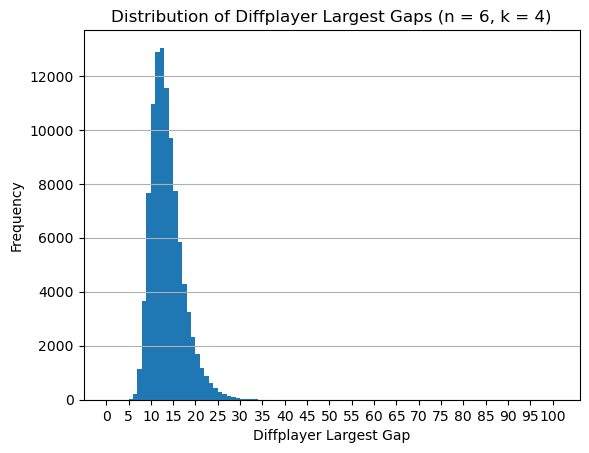

13.15407

In [7]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt

def largest_gap_diffplayer(cards,n,k):
    cards = cards.flatten()
    player_num = np.tile(np.arange(1, n+1), (k, 1)).T
    player_num =player_num.flatten()
    table = np.vstack((cards, player_num))
    indices = np.argsort(table[0])
    sorted_table = table[:, indices]
    gaps = np.diff(sorted_table[0]) 
    num_diff = np.diff(sorted_table[1])
    zero_indices = np.where(num_diff == 0)[0]
    gaps = np.delete(gaps, zero_indices)
    return np.max(gaps)

def diff_largestgap_cards(N, n, k, samples):
    
    diff_largest_gaps = []  
    
    for _ in range(samples):
        cards = sample_cards(N, n, k)
        diff_largest_gaps.append(largest_gap_diffplayer(cards,n,k))
    
    # histogram
    plt.hist(diff_largest_gaps, bins=np.arange(0, N+2))
    plt.xlabel('Diffplayer Largest Gap')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Diffplayer Largest Gaps (n = {n}, k = {k})')
    plt.xticks(np.arange(0, N+1, 5))
    plt.grid(axis = 'y')
    plt.show()
    return np.mean(diff_largest_gaps )
    

N = 100  
n = 6    
k = 4   
samples = 100000  

diff_largestgap_cards(N, n, k, samples)


How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

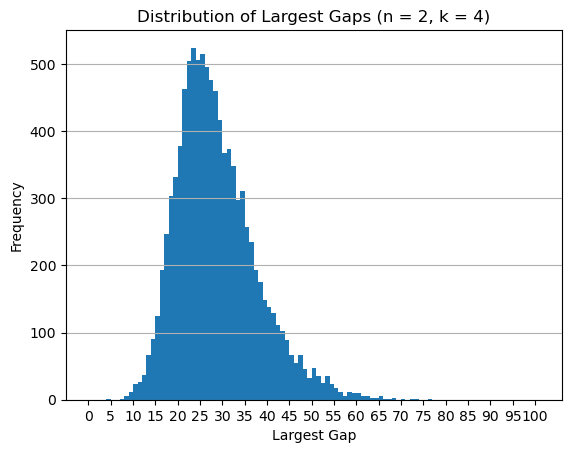

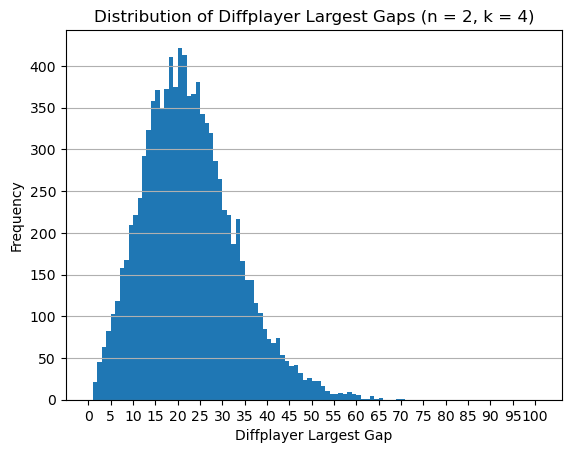

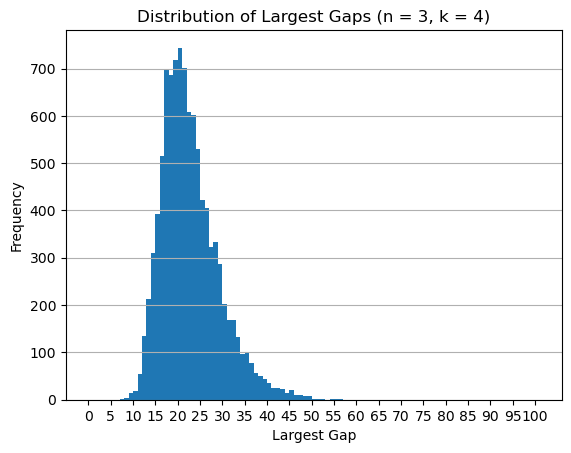

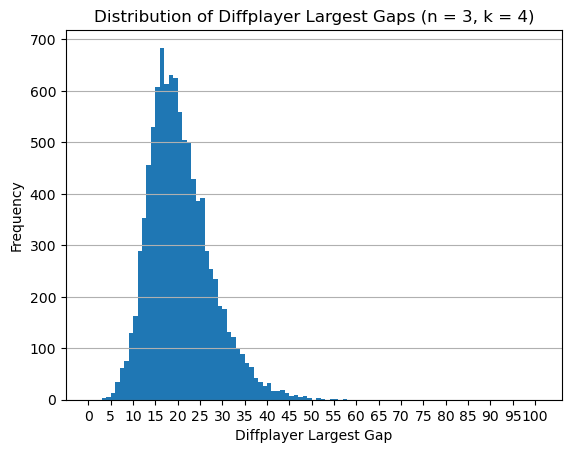

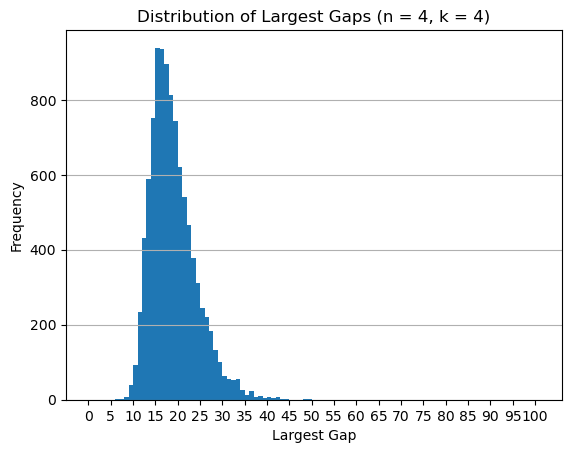

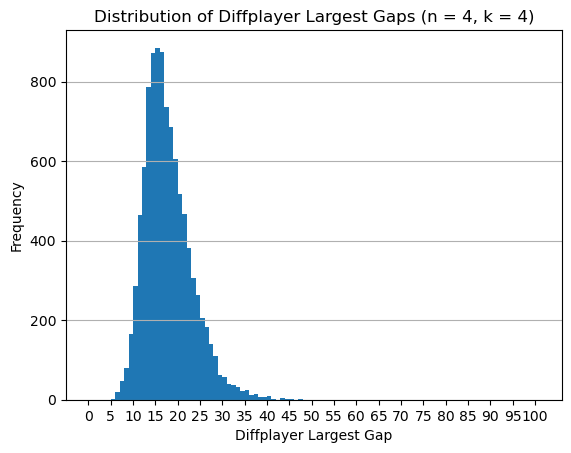

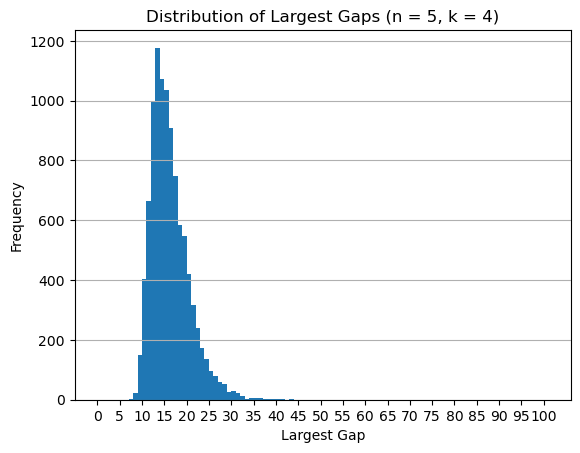

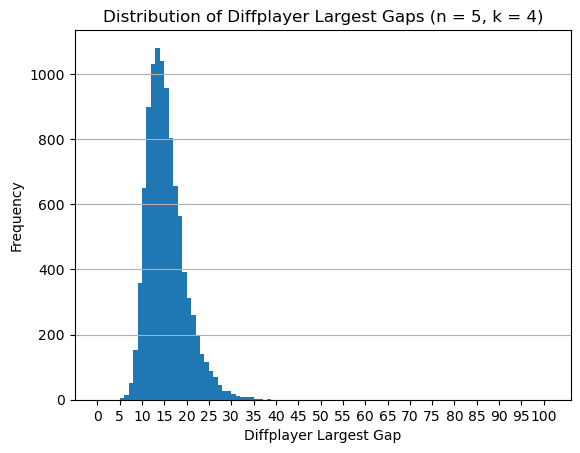

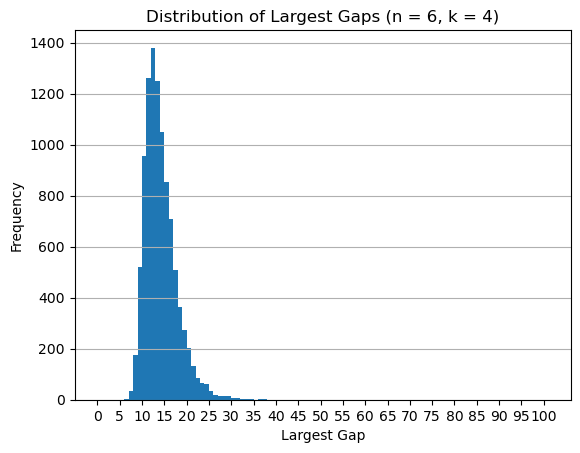

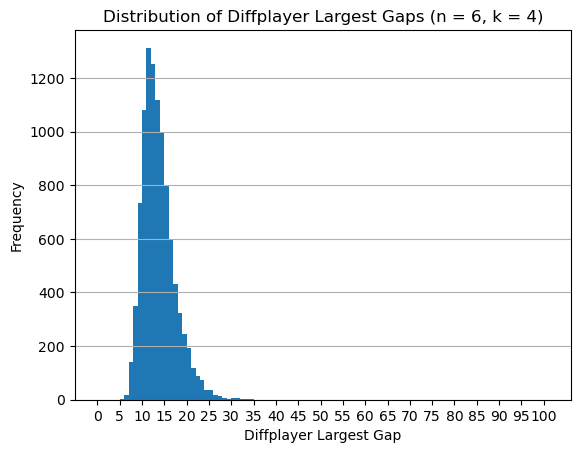

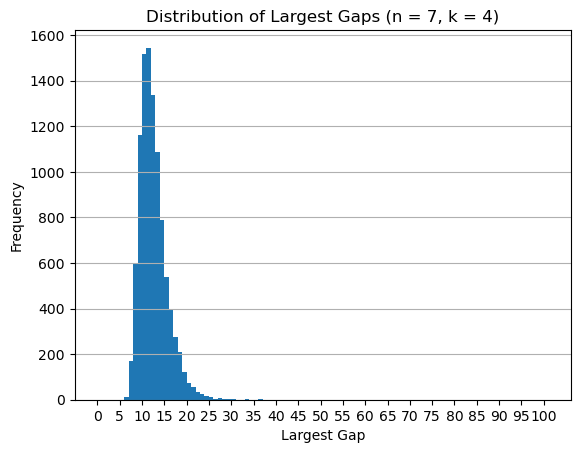

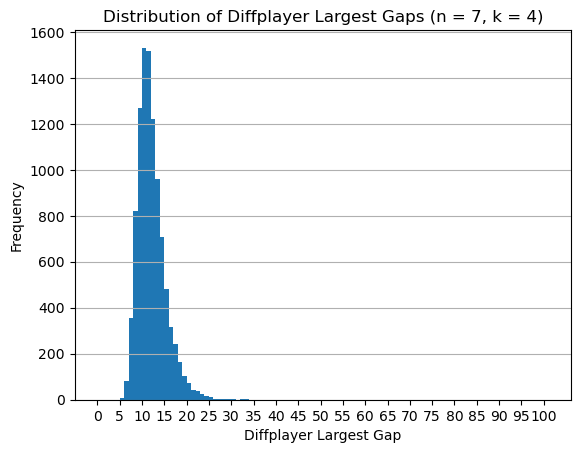

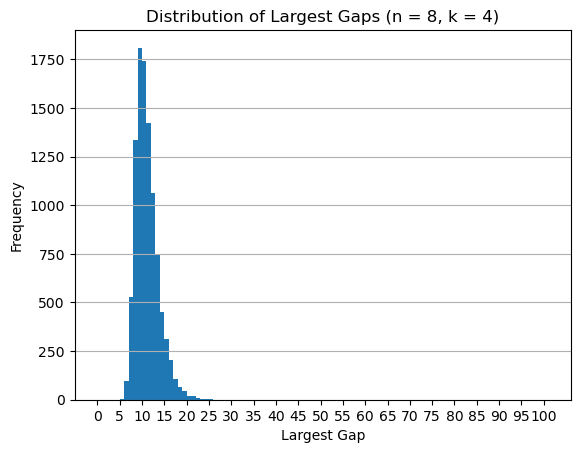

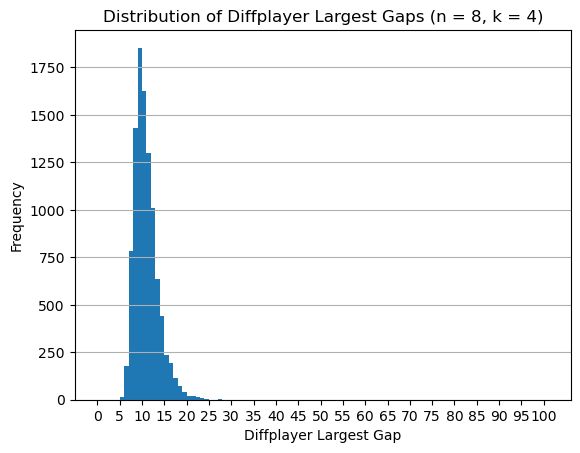

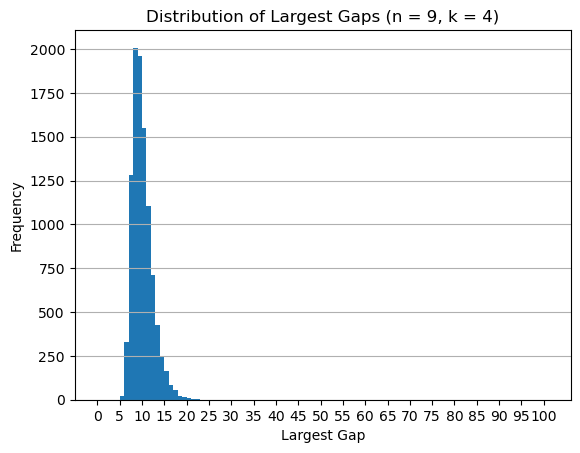

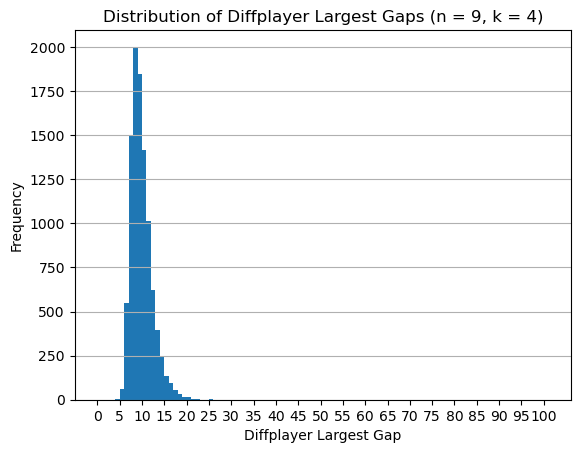

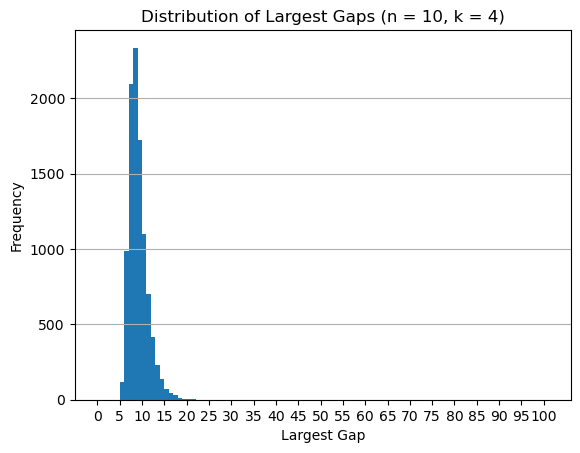

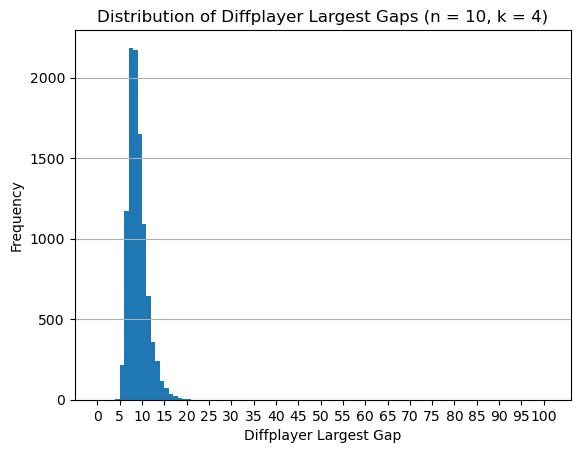

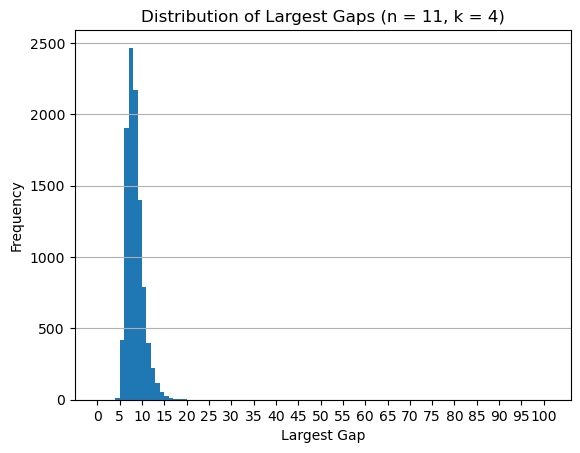

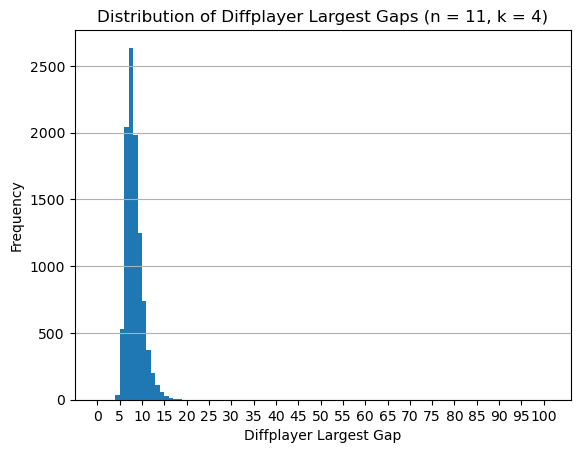

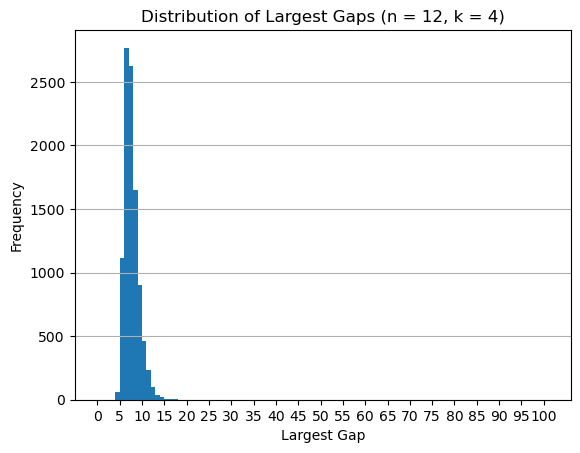

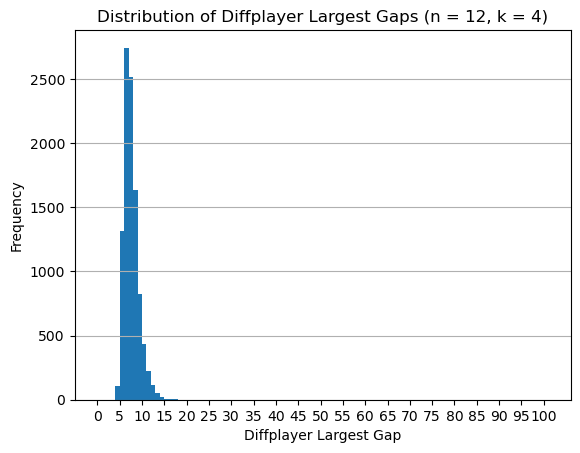

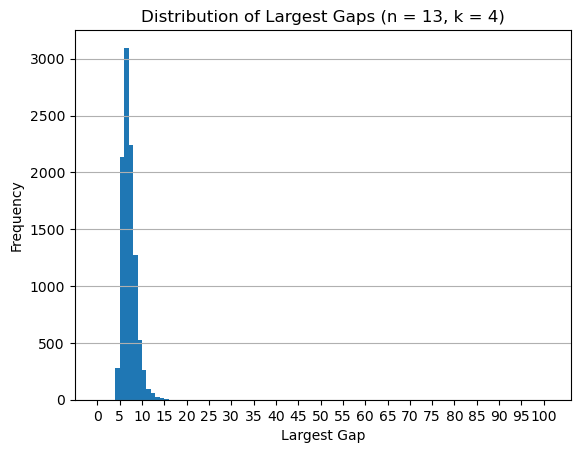

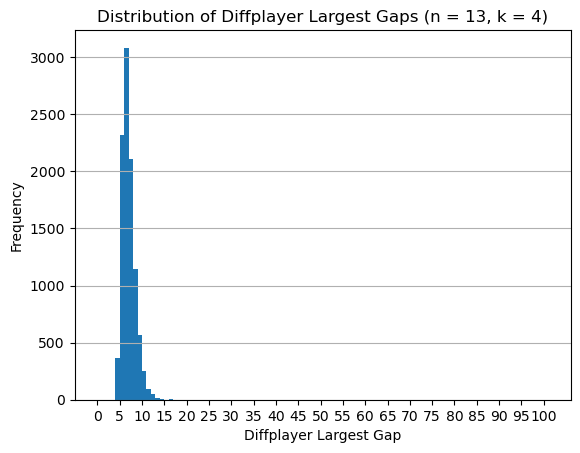

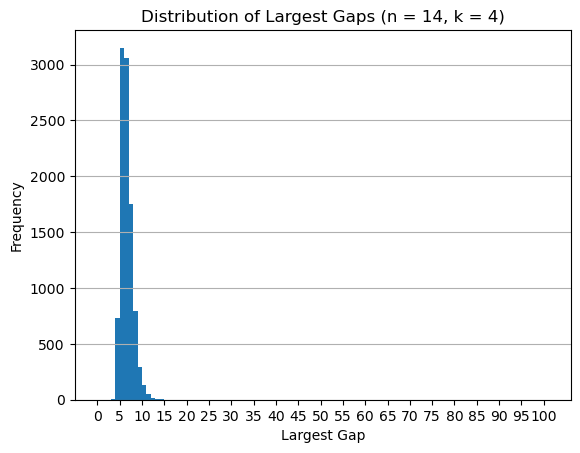

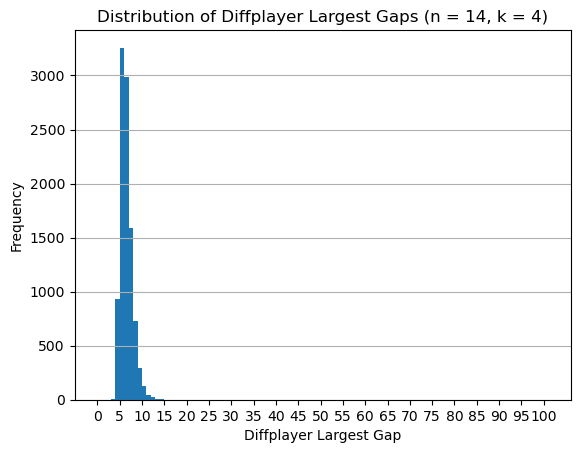

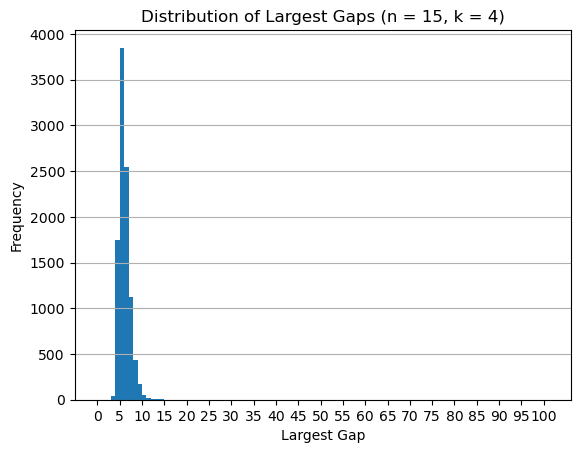

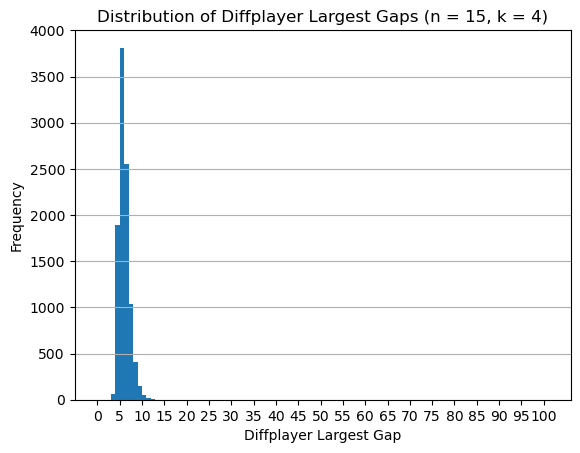

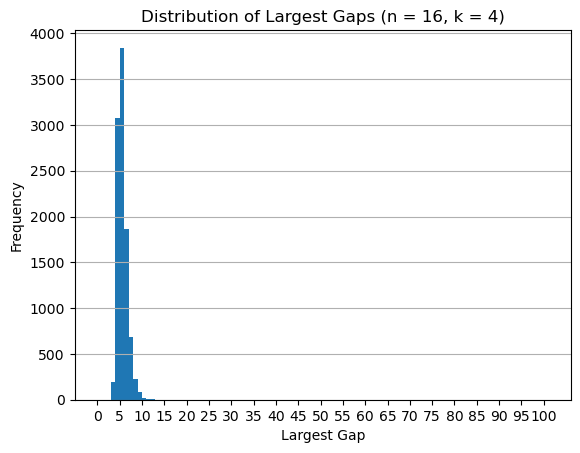

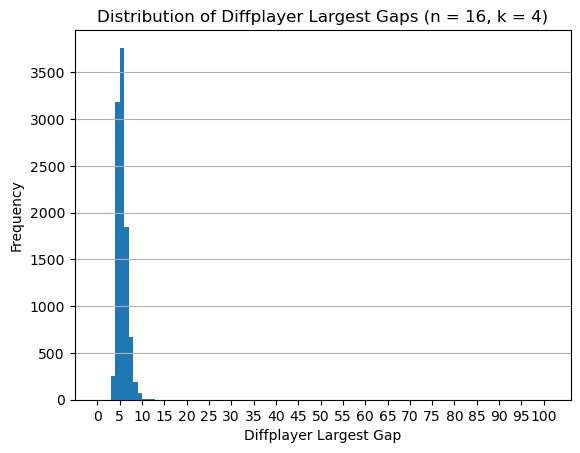

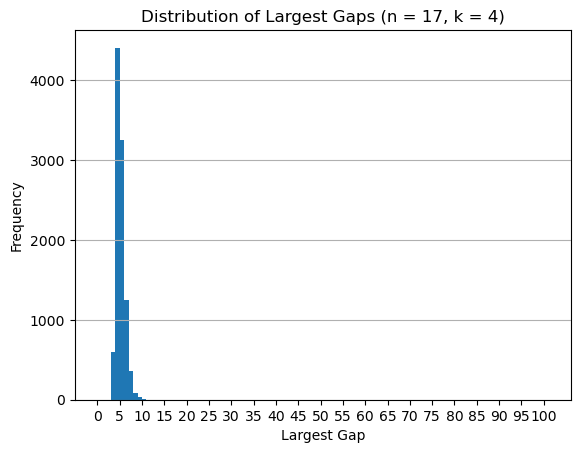

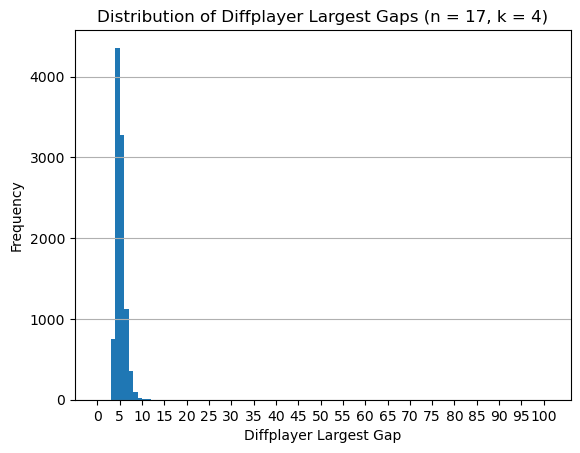

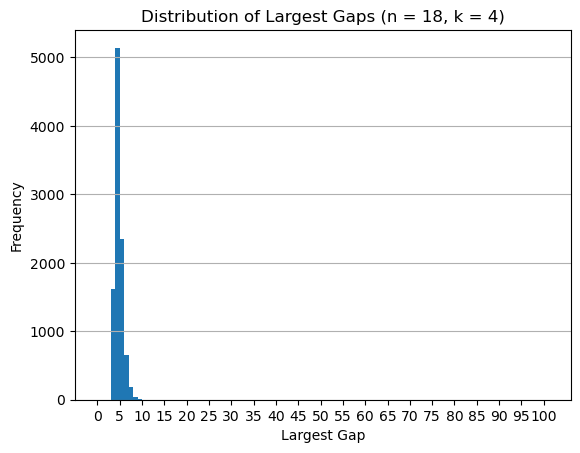

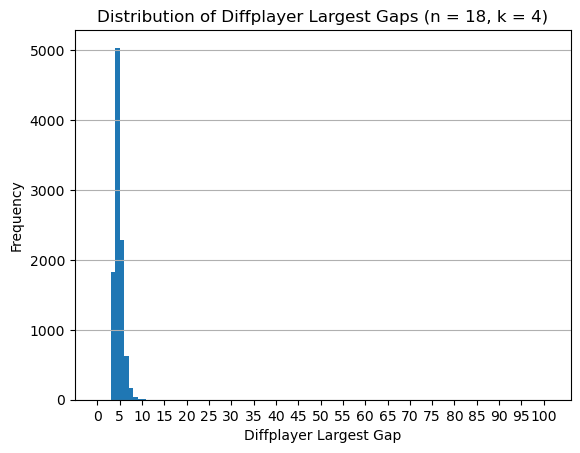

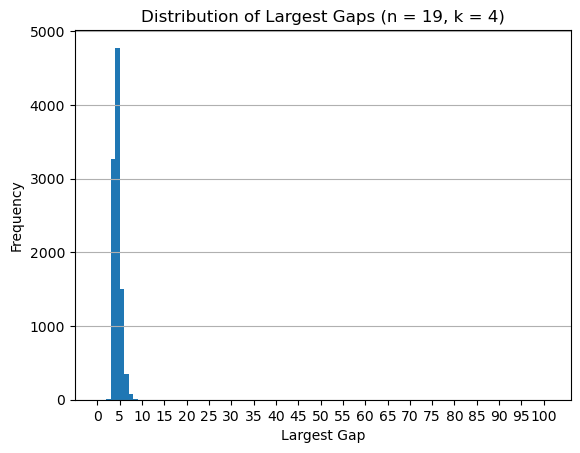

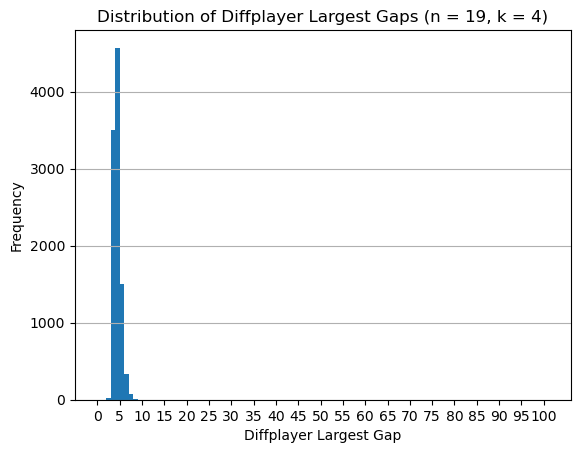

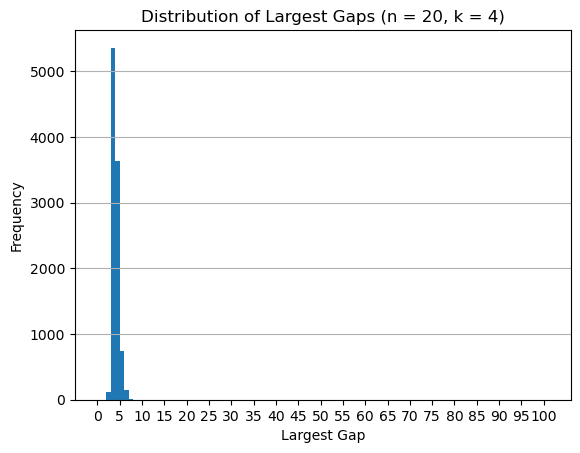

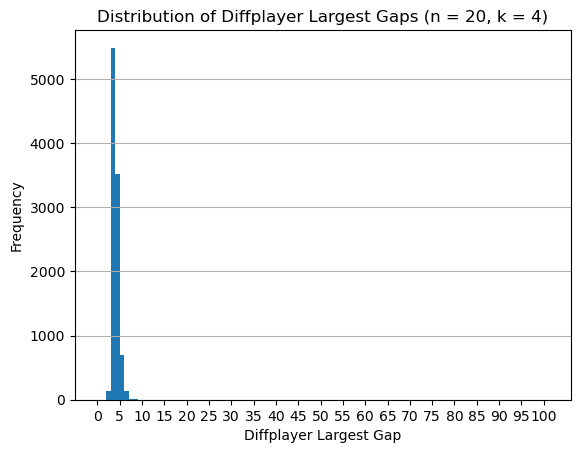

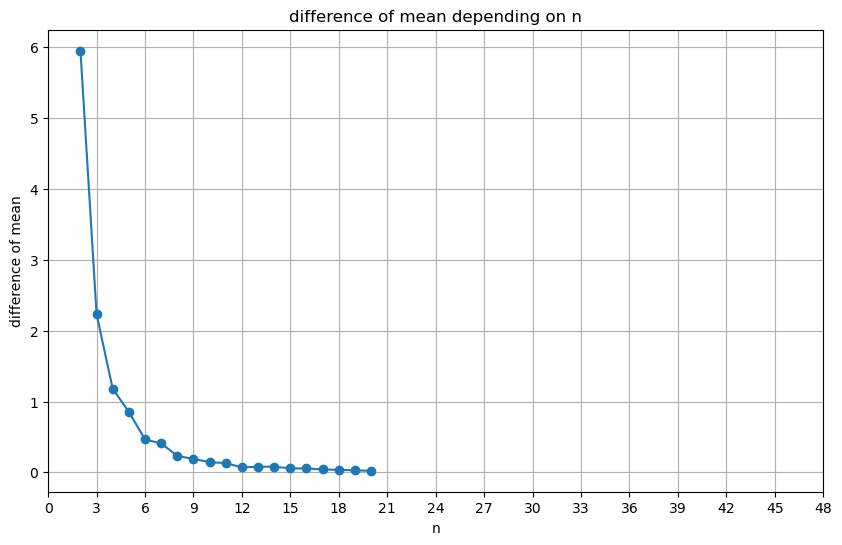

In [16]:
N = 100  
k = 4   
samples = 10000  

# calculate the difference between the mean of the two distributions for different value of n
n_values = np.arange(2, 21)
diff_means = []

for n in n_values:
    diff_mean = largestgap_cards(N, n, k, samples) - diff_largestgap_cards(N, n, k, samples)
    diff_means.append(diff_mean)

diff_means = np.array(diff_means)

plt.figure(figsize=(10, 6))
plt.plot(n_values, diff_means, marker='o')
plt.xticks(np.arange(0, 50, 3))
plt.xlabel('n')
plt.ylabel('difference of mean')
plt.title('difference of mean depending on n')
plt.grid(True)
plt.show()

The mean of the largest gap of cards from all players is always bigger than the mean of the largest gap of cards from different players. 

As the difference between k and n is larger, the disparity between the two distributions decreases. With the increase of n, the difference between the mean of two distributions becomes smaller.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

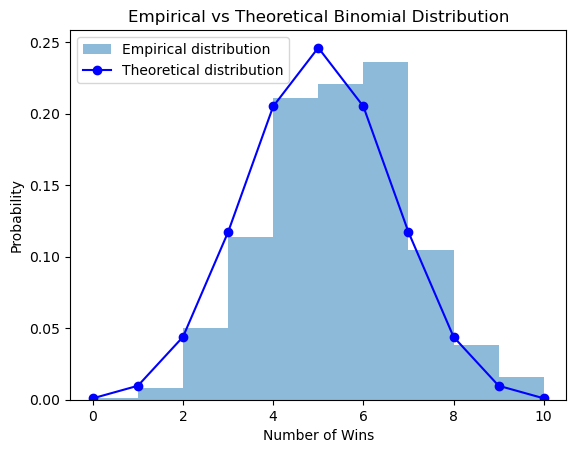

In [3]:
# To Do cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def sample_game(k, n):
    """
    Generates a simulated sample of how the cards are shuffled to 1 player. 
    
    Arguments: 
        - k : Total number of cards
        - n : Number of cards per player
        
    count the number of even in the player's card which follows the binomial distribution
    """
    
    assert n  <= k, "There are not enough cards for the player!"
    
    _cards = np.random.choice(a=np.arange(1, k+1), size=n, replace=True)
    _cards_1 = 0
    for i in _cards:
        if i % 2 == 0:
            _cards_1 += 1 
    return _cards_1

n = 10 
k = 50

# multiple simulations 
N = 1000
even_count = []
for i in range(1, N+1):
    even_count.append(sample_game(k,n))  

# empirical distribution
plt.hist(even_count, bins=np.arange(n+1), density=True, alpha=0.5, label='Empirical distribution')

# theoretical distribution
x = np.arange(0, n+1)
binom_dist = binom.pmf(x, n, 0.5)
plt.plot(x, binom_dist, 'bo-', label='Theoretical distribution')

plt.xlabel('Number of Wins')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Binomial Distribution')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

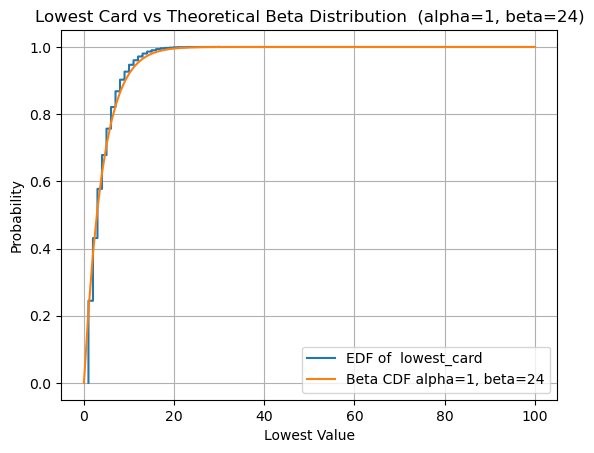

In [41]:
# To Do cell

from scipy.stats import beta

def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

def lowest_card(N, n, k, samples):
    
    lowest_card = []  
    
    for _ in range(samples):
        cards = sample_cards(N, n, k)
        lowest_card.append(np.min(cards))  
    
   
    sorted_data = np.sort(lowest_card)
    edf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.step(sorted_data, edf, where='post', label='EDF of  lowest_card ')



N = 100  
n = 6    
k = 4   
samples = 10000  

# Lowest Card Distribution
lowest_card(N, n, k, samples)

# Beta(1,24)  distribution
a = 1
b = 24
x = np.linspace(0, 1, 100)

cdf_values = beta.cdf(x, a, b)
plt.plot(x*100, cdf_values, label=f'Beta CDF alpha={a}, beta={b}')

plt.grid(True)
plt.xlabel('Lowest Value')
plt.ylabel('Probability')
plt.title(f'Lowest Card vs Theoretical Beta Distribution  (alpha={a}, beta={b})')
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

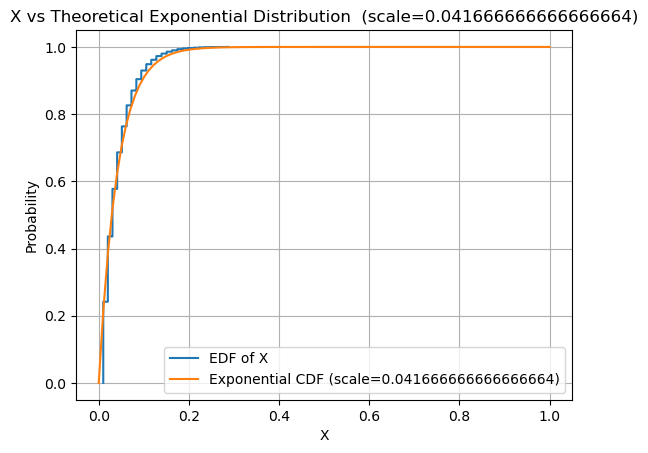

In [46]:
# To Do cell
from scipy.stats import expon

def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

def lowest_card(N, n, k, samples):
    
    minimum = []  
    
    for _ in range(samples):
        cards = sample_cards(N, n, k)
        minimum .append(np.min(cards))  
    return minimum

        
N = 100  
n = 6    
k = 4   
samples = 10000  

# Lowest Card Distribution
minimum = lowest_card(N, n, k, samples)
X = []
for u in minimum:
    X.append( -np.log(1-u/N))

sorted_data = np.sort(X)
edf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, edf, where='post', label='EDF of X ')



# exponential distribution(nk)
scale_param = 1/(n*k)  

x = np.linspace(0, 1, 100)
cdf_values = expon.cdf(x, scale=scale_param)

plt.plot(x, cdf_values, label=f'Exponential CDF (scale={scale_param})')

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title(f'X vs Theoretical Exponential Distribution  (scale={scale_param})')
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

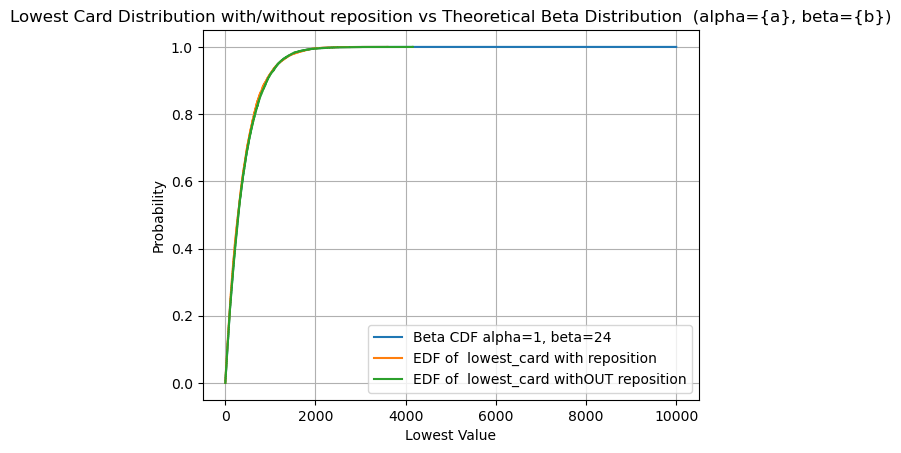

In [61]:
# To Do cell
N = 10000
n = 6    
k = 4   
samples = 10000  

# Beta(1,24)  distribution
a = 1
b = 24
x = np.linspace(0, 1, 100)

cdf_values = beta.cdf(x, a, b)
plt.plot(x*10000, cdf_values, label=f'Beta CDF alpha={a}, beta={b}')

# with reposition
def sample_cards_repostion(N, n, k):

    assert n * k <= N, "There are not enough cards for all the players!"
    cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    return cards

def lowest_card_repostion(N, n, k, samples):
    
    minimum = []  
    
    for _ in range(samples):
        cards = sample_cards_repostion(N, n, k)
        minimum .append(np.min(cards))  
    return minimum

minimum_1 = lowest_card_repostion(N, n, k, samples)
sorted_data = np.sort(minimum_1)
edf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, edf, where='post', label='EDF of  lowest_card with reposition')


# without reposition
def sample_cards(N, n, k):

    assert n * k <= N, "There are not enough cards for all the players!"
    cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    return cards

def lowest_card(N, n, k, samples):
    
    minimum = []  
    
    for _ in range(samples):
        cards = sample_cards(N, n, k)
        minimum .append(np.min(cards))  
    return minimum

minimum_2 = lowest_card(N, n, k, samples)
sorted_data = np.sort(minimum_2)
edf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, edf, where='post', label='EDF of  lowest_card withOUT reposition')



plt.grid(True)
plt.xlabel('Lowest Value')
plt.ylabel('Probability')
plt.title('Lowest Card Distribution with/without reposition vs Theoretical Beta Distribution  (alpha={a}, beta={b})')
plt.legend()
plt.show()


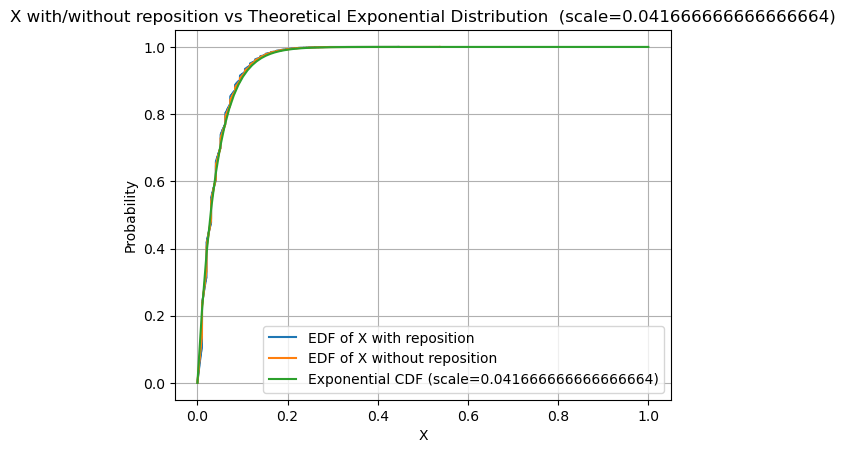

In [62]:
# with reposition
for u in minimum_1:
    X.append( -np.log(1-u/N))

sorted_data = np.sort(X)
edf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, edf, where='post', label='EDF of X with reposition')

# without reposition
for u in minimum_2:
    X.append( -np.log(1-u/N))

sorted_data = np.sort(X)
edf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, edf, where='post', label='EDF of X without reposition')

# exponential distribution(nk)
scale_param = 1/(n*k)  

x = np.linspace(0, 1, 100)
cdf_values = expon.cdf(x, scale=scale_param)

plt.plot(x, cdf_values, label=f'Exponential CDF (scale={scale_param})')

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title(f'X with/without reposition vs Theoretical Exponential Distribution  (scale={scale_param})')
plt.legend()
plt.show()

when $n * k << N$ The distribution obtained by sampling in the game can be accurately fitted to a theoretical distribution. 

sampling with and without reposition as $n * k << N$ lead to similar results. 

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Jiarong Zhou (github username: jiarongzhou)
- Member No2: Yimeng Yin (github username: yimengyin)
- Member No3: 